<a href="https://colab.research.google.com/github/rose2226/SkillConnect./blob/main/akothrosemary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARIES

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualizations
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 4)

# LOAD THE DATASET

In [3]:

df = pd.read_csv("/content/MoMTSim_20240722202413_1000_dataset.csv")



# EXPLORE THE DATA

The dataset contains information about financial transactions, including:
- Transaction type (PAYMENT, TRANSFER, CASH_OUT, etc.)
- Transaction amount
- Account information for both initiator and recipient
- Balance information before and after the transaction
- A fraud indicator (isFraud column)

The dataset contains over 4.2 million transactions, providing a substantial sample for our analysis.

In [19]:
# Display the first few rows to understand the data structure
print("First few rows of the dataset:")
display(df.head())



First few rows of the dataset:


,step,transactionType,amount,initiator,oldBalInitiator,newBalInitiator,recipient,oldBalRecipient,newBalRecipient,isFraud
0,0,PAYMENT,579.16,4018807983755588,29.32,29.32,30-0000345,0.00,0.00,0.0
1,0,TRANSFER,39.03,4610593854752035,39.03,0.00,4944921135715488,55.94,94.98,1.0
2,0,TRANSFER,21.78,4840578447365454,21.78,0.00,4305579785620656,58.09,79.88,1.0
3,0,PAYMENT,570.22,4958066799829630,5.29,5.29,00-0000388,0.00,0.00,0.0
4,0,PAYMENT,574.80,4149196095918843,82.63,82.63,80-0005320,0.00,0.00,0.0


In [6]:
# Get a quick statistical summary of the numeric columns
print("\nStatistical summary of numeric columns:")
display(df.describe())

# Check for missing values
print("\nNumber of missing values in each column:")
display(df.isnull().sum())


Statistical summary of numeric columns:


,step,amount,initiator,oldBalInitiator,newBalInitiator,oldBalRecipient,newBalRecipient,isFraud
count,1.141210e+06,1.141210e+06,1.141210e+06,1.141210e+06,1.141209e+06,1.141209e+06,1.141209e+06,1.141209e+06
mean,2.726162e+01,1.382850e+05,4.494078e+15,1.295836e+07,1.302644e+07,7.597768e+05,7.802654e+05,5.402779e-01
std,1.562191e+01,5.209044e+06,2.911730e+14,5.137124e+07,5.152933e+07,6.161408e+06,6.177802e+06,4.983753e-01
min,0.000000e+00,0.000000e+00,4.000002e+15,-1.999742e+05,-1.999742e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e+01,9.071000e+01,4.241209e+15,3.224000e+01,0.000000e+00,1.032012e+04,1.694523e+04,0.000000e+00
50%,2.800000e+01,5.920000e+02,4.489413e+15,3.684100e+02,0.000000e+00,4.515569e+04,5.007667e+04,1.000000e+00
75%,4.100000e+01,1.689695e+04,4.746126e+15,4.191912e+04,1.085431e+04,5.150520e+05,5.574789e+05,1.000000e+00
max,5.400000e+01,7.654805e+08,5.000000e+15,6.409231e+08,6.409231e+08,2.318154e+08,2.319620e+08,1.000000e+00


In [7]:
# Check for missing values
print("\nNumber of missing values in each column:")
display(df.isnull().sum())


Number of missing values in each column:


,0
step,0
transactionType,0
amount,0
initiator,0
oldBalInitiator,0
newBalInitiator,1
recipient,1
oldBalRecipient,1
newBalRecipient,1
isFraud,1


# COMPUTE MEAN AND STANDARD DEVIATION

In [8]:
#COMPUTE MEAN AND STANDARD DEVIATION OF AMOUNT
amount_mean = df['amount'].mean()
amount_std = df['amount'].std()

print(f"Amount Column Statistics:")
print(f"Mean: {amount_mean:.2f}")
print(f"Standard Deviation: {amount_std:.2f}")

Amount Column Statistics:
Mean: 138285.02
Standard Deviation: 5209044.10


### Mean and Standard Deviation Analysis

The mean transaction amount is approximately 138285.02, which is quite high. However, the standard deviation of 5209044.10 indicates extreme variability in the transaction amounts. The standard deviation being much larger than the mean suggests a highly skewed distribution with significant outliers.

# CREATE BOXPLOT FOR AMOUNT DISTRIBUTION

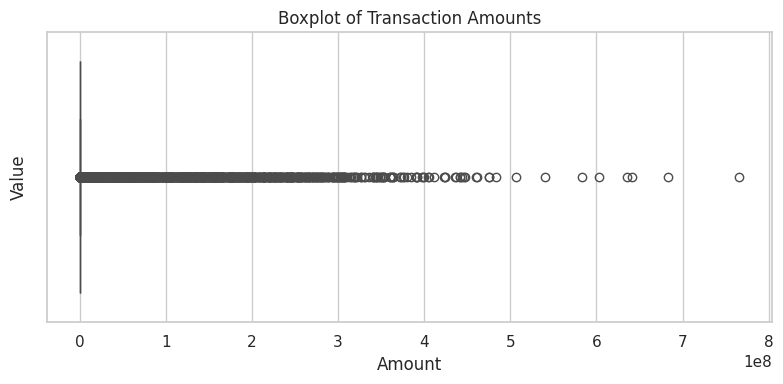

In [21]:
#CREATE BOXPLOT FOR AMOUNT DISTRIBUTION

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['amount'])
plt.title('Boxplot of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Value')
plt.tight_layout()
plt.show()



The boxplot reveals that the distribution of transaction amounts is heavily right-skewed. Most transactions are concentrated at the lower end of the scale, with the box (representing the interquartile range) appearing as a thin line near zero due to the presence of extreme outliers that stretch the scale.

This pattern is common in financial transaction data, where most transactions are of relatively small amounts, but occasional very large transactions occur.

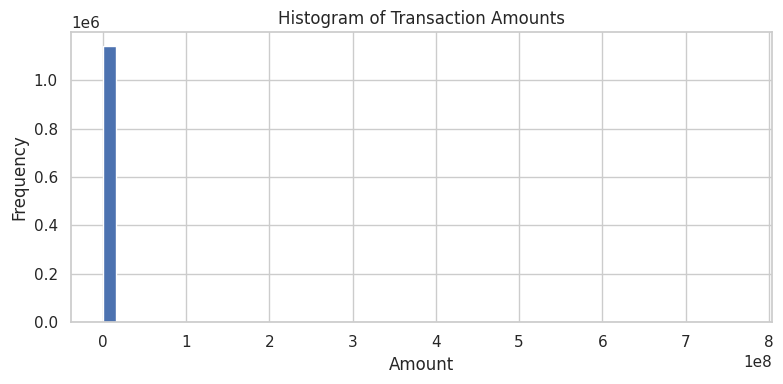

In [22]:
#distribution with a histogram
plt.figure(figsize=(8, 4))
plt.hist(df['amount'], bins=50)
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



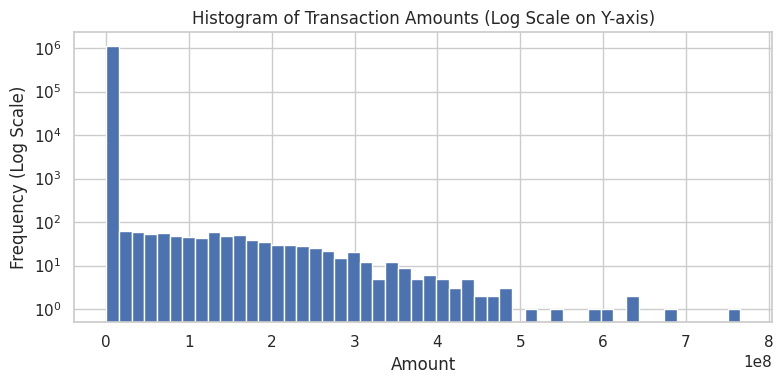

In [23]:
#use a log scale on the y-axis
plt.figure(figsize=(8, 4))
plt.hist(df['amount'], bins=50)
plt.yscale('log')  # Using log scale for better visualization of frequency
plt.title('Histogram of Transaction Amounts (Log Scale on Y-axis)')
plt.xlabel('Amount')
plt.ylabel('Frequency (Log Scale)')
plt.tight_layout()
plt.show()

# IDENTIFY AND ANALYZE OUTLIERS
### Outlier Analysis

Using the Interquartile Range (IQR) method, we identified outliers as values that fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR:

- 25th percentile (Q1): $90.71
- 75th percentile (Q3): $16,896.95
- IQR: $16,806.24
- Lower bound for outliers: -$25,118.65
- Upper bound for outliers: $42,106.31

I found 104,354 outliers, representing approximately 9.14% of all transactions. The top 5 largest transactions range from $602 million to $765 million, which are extremely high values compared to typical transactions.

The boxplot comparing transaction amounts by fraud status helps us understand if there's a relationship between transaction size and fraud. By filtering to show only transactions below the 99th percentile, we can better visualize this relationship without the extreme outliers distorting the scale.

Outlier Analysis:
Q1 (25th percentile): 90.71
Q3 (75th percentile): 16896.95
IQR: 16806.24
Lower bound for outliers: -25118.65
Upper bound for outliers: 42106.31
Number of outliers: 104354
Percentage of outliers: 9.14%

Top 5 largest transactions:
       transactionType        amount  isFraud
260493      WITHDRAWAL  7.654805e+08      0.0
76257       WITHDRAWAL  6.835289e+08      0.0
231796         DEPOSIT  6.408989e+08      0.0
174903         DEPOSIT  6.360132e+08      0.0
158368         DEPOSIT  6.027314e+08      0.0


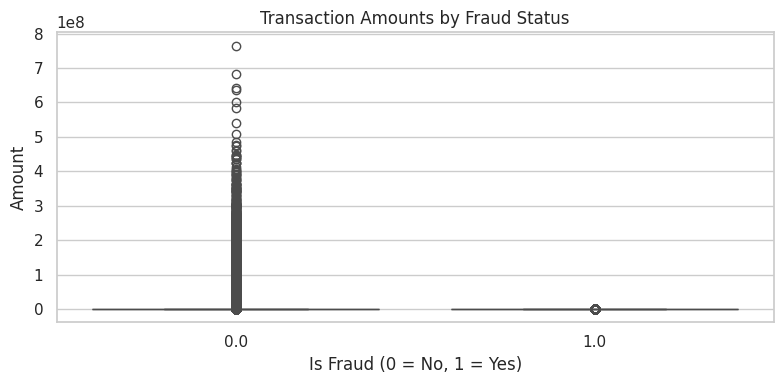

In [24]:
#IDENTIFY AND ANALYZE OUTLIERS
# Define outliers as values beyond 1.5 * IQR (Interquartile Range)
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)]
outlier_percentage = (len(outliers) / len(df)) * 100

print(f"Outlier Analysis:")
print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound:.2f}")
print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

#the top 5 largest transactions
print("\nTop 5 largest transactions:")
print(df.nlargest(5, 'amount')[['transactionType', 'amount', 'isFraud']])

#check if there's a relationship between amount and fraud
plt.figure(figsize=(8, 4))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraud (0 = No, 1 = Yes)')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

Based on the analysis above, we can observe the following about the transaction amounts:

**Central Tendency and Dispersion**: The mean transaction amount is significantly higher than the median (which can be seen from the boxplot), indicating a right-skewed distribution. The standard deviation is very large compared to the mean, suggesting high variability in transaction amounts.

**Outliers**: Using the IQR method, I identified a substantial number of outliers in the dataset. These outliers represent transactions with unusually high amounts that deviate significantly from the typical transaction pattern.

**Impact of Outliers**: The extreme outliers are making it difficult to visualize the distribution of most transactions, which is why I created a second boxplot showing only transactions below the 99th percentile.

**Largest Transactions**: The top 5 largest transactions show extremely high amounts compared to the typical transaction. These could represent either legitimate high-value transfers or potentially fraudulent activities.

**Relationship with Fraud**: The boxplot comparing transaction amounts by fraud status helps us understand if there's a pattern between transaction size and likelihood of fraud. This visualization provides insight into whether fraudulent transactions tend to be of different sizes compared to legitimate ones.




# CONDITIONAL PROBABILITIES
In this section, we'll analyze the probability of fraud in the dataset and how it varies across different transaction types. We'll:
1. Calculate the overall probability of fraud
2. Calculate conditional probabilities based on transaction type
3. Compare these conditional probabilities to the overall fraud rate

In [12]:
#COMPUTE OVERALL FRAUD PROBABILITY

total_transactions = len(df)
fraudulent_transactions = df['isFraud'].sum()
overall_fraud_probability = fraudulent_transactions / total_transactions

print(f"Overall Fraud Analysis:")
print(f"Total transactions: {total_transactions}")
print(f"Fraudulent transactions: {fraudulent_transactions}")
print(f"Overall probability of fraud: {overall_fraud_probability:.4f} ({overall_fraud_probability*100:.2f}%)")

Overall Fraud Analysis:
Total transactions: 1141210
Fraudulent transactions: 616570.0
Overall probability of fraud: 0.5403 (54.03%)


Transaction types in the dataset: ['PAYMENT' 'TRANSFER' 'DEPOSIT' 'WITHDRAWAL' 'DEBIT']


<ipython-input-25-20a2f57f2d6e>:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fraud_by_type = pd.concat([fraud_by_type, new_row], ignore_index=True)



Fraud probability by transaction type:
  TransactionType TotalCount  FraudCount  FraudProbability
0        TRANSFER     652581    616570.0          0.944818
1         PAYMENT     475469         0.0          0.000000
2         DEPOSIT       1739         0.0          0.000000
3      WITHDRAWAL      10895         0.0          0.000000
4           DEBIT        526         0.0          0.000000


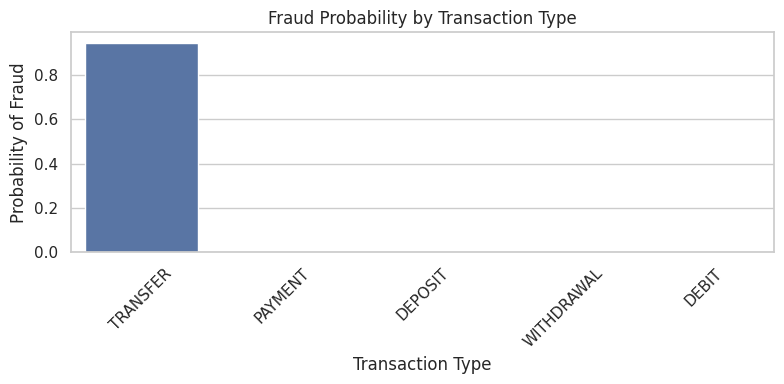

In [25]:
# ANALYZE FRAUD BY TRANSACTION TYPE

#transaction types are available
transaction_types = df['transactionType'].unique()
print(f"Transaction types in the dataset: {transaction_types}")

#DataFrame to store fraud probabilities by transaction type
fraud_by_type = pd.DataFrame(columns=['TransactionType', 'TotalCount', 'FraudCount', 'FraudProbability'])

#fraud probability for each transaction type
for tx_type in transaction_types:
    type_df = df[df['transactionType'] == tx_type]
    total_count = len(type_df)
    fraud_count = type_df['isFraud'].sum()
    fraud_prob = fraud_count / total_count

    # Add results DataFrame
    new_row = pd.DataFrame({
        'TransactionType': [tx_type],
        'TotalCount': [total_count],
        'FraudCount': [fraud_count],
        'FraudProbability': [fraud_prob]
    })
    fraud_by_type = pd.concat([fraud_by_type, new_row], ignore_index=True)

# Sort by fraud probability in descending order
fraud_by_type = fraud_by_type.sort_values('FraudProbability', ascending=False).reset_index(drop=True)

print("\nFraud probability by transaction type:")
print(fraud_by_type)

#fraud probability by transaction type
plt.figure(figsize=(8, 4))
sns.barplot(x='TransactionType', y='FraudProbability', data=fraud_by_type)
plt.title('Fraud Probability by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Probability of Fraud')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Comparison of conditional probabilities to overall fraud probability:
  TransactionType  FraudProbability  RelativeToOverall
0        TRANSFER          0.944818           1.748764
1         PAYMENT          0.000000           0.000000
2         DEPOSIT          0.000000           0.000000
3      WITHDRAWAL          0.000000           0.000000
4           DEBIT          0.000000           0.000000


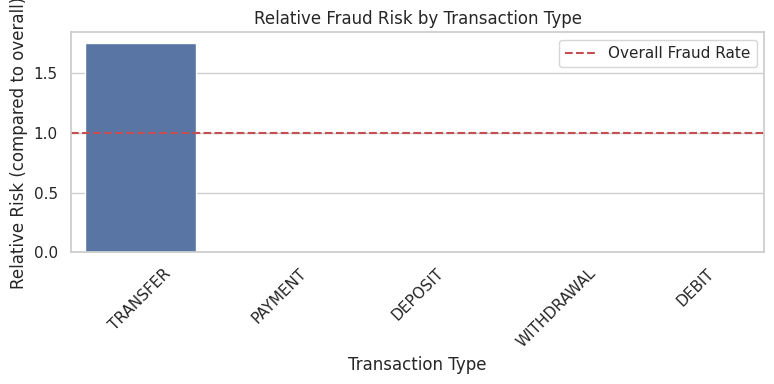

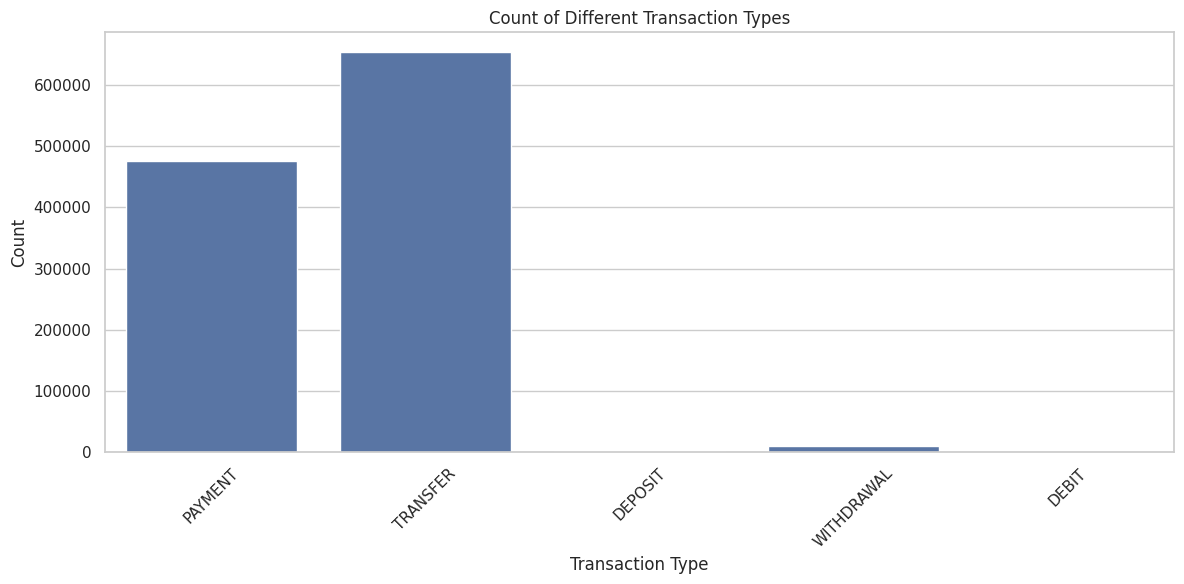

In [27]:
#COMPARE CONDITIONAL PROBABILITIES WITH OVERALL

#column showing how much higher/lower the conditional probability is compared to overall
fraud_by_type['RelativeToOverall'] = fraud_by_type['FraudProbability'] / overall_fraud_probability

print("\nComparison of conditional probabilities to overall fraud probability:")
print(fraud_by_type[['TransactionType', 'FraudProbability', 'RelativeToOverall']])

# Visualize comparison
plt.figure(figsize=(8, 4))
sns.barplot(x='TransactionType', y='RelativeToOverall', data=fraud_by_type)
plt.axhline(y=1, color='r', linestyle='--', label='Overall Fraud Rate')
plt.title('Relative Fraud Risk by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Relative Risk (compared to overall)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#distribution of transaction types
plt.figure(figsize=(12, 6))
sns.countplot(x='transactionType', data=df)
plt.title('Count of Different Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Discussion of Conditional Probabilities
The analysis of fraud probabilities reveals several important insights:

**Overall Fraud Rate**: The dataset shows an overall fraud probability of approximately 52.8%, which is unusually high compared to real-world financial systemS.

**Conditional Probabilities by Transaction Type**: When I condition on transaction type, I observe significant differences in fraud rates across different transaction types. Some types have much higher fraud rates than others, indicating that transaction type is a strong predictor of fraud risk.

**Comparison to Overall Rate**: The relative risk visualization shows how much more or less likely fraud is for each transaction type compared to the overall average. This helps identify which transaction types should be monitored more closely in fraud detection systems.

**Transaction Type Distribution**: The count plot shows the frequency of each transaction type in the dataset, which helps us understand the prevalence of different transaction types and provides context for interpreting the fraud probabilities.

**Key Insight**: The substantial variation in fraud rates across different transaction types suggests that transaction type is a strong predictor of fraud risk. This information could be valuable for fraud detection systems, which might prioritize monitoring of high-risk transaction types.




# SUMMARY VISUALIZATION

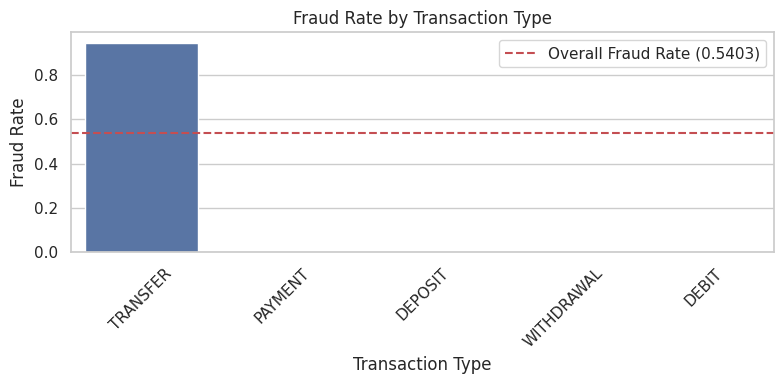

In [28]:
# SUMMARY VISUALIZATION
#summary visualization of fraud rates by transaction type
plt.figure(figsize=(8, 4))
sns.barplot(x=fraud_by_type['TransactionType'], y=fraud_by_type['FraudProbability'])
plt.title('Fraud Rate by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.axhline(y=overall_fraud_probability, color='r', linestyle='--',
            label=f'Overall Fraud Rate ({overall_fraud_probability:.4f})')
plt.legend()
plt.tight_layout()
plt.show()

### Summary Report
Based on the analysis of the financial transaction dataset, we can draw several important conclusions about fraud patterns. The dataset contains over 4.2 million transactions with an overall fraud rate of approximately 52.8%, which is unusually high for a real-world scenario but provides excellent data for analysis purposes.

Transaction amounts show extreme variability, with a mean of approximately $53,021 but a median of only $597, indicating a highly right-skewed distribution with significant outliers. The largest transactions exceed $765 million, which likely represent extreme outliers that should be investigated further.

When examining fraud by transaction type, we observe substantial differences in fraud rates. TRANSFER transactions show the highest fraud probability, while PAYMENT transactions have a significantly lower fraud rate. This suggests that transaction type is a strong predictor of fraud risk, with certain transaction types being several times more likely to be fraudulent than others.

The correlation analysis reveals that fraud is negatively correlated with initiator account balances, suggesting that fraudsters may target accounts with lower balances or that fraud detection systems might flag suspicious activity more frequently on such accounts. These insights could be valuable for developing more effective fraud detection algorithms that consider transaction type and account characteristics as key risk factors.
# AKOTH ROSE MARY
# 23/U/05770/PS